# Dependencies and files

## Install dependencies

## Imports

In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

Нужно подключить свой гугл диск

In [2]:
de_dir_path = './results/'

In [3]:
os.listdir(de_dir_path)

['anova_mamm_mean.csv',
 'pb_mammals_filtered.h5ad',
 'pb_mammals_samplenorm_mean.h5ad',
 'ttest_mamm_mean.csv']

### DE results

In [4]:
anova_res = pd.read_csv(de_dir_path + 'anova_mamm_mean.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

,sum_sq,df,F,PR(>F),p_val_adj
A1BG,0.122578,12.0,2.796490,0.003701,0.010364
AAAS,0.017527,12.0,0.944161,0.509517,0.596369
AACS,0.136394,12.0,2.729393,0.004508,0.012212
AADAT,0.057031,12.0,5.478881,0.000002,0.000016
AAGAB,0.043359,12.0,2.127609,0.026045,0.053640


In [5]:
ttest_res = pd.read_csv(de_dir_path + 'ttest_mamm_mean.csv', index_col=0)
ttest_res.head()

,gene,layer,group1,group2,score,pvalue,p_val_adj
0,A1BG,L1,human,chimp,-1.790136,0.123630,0.345077
1,AACS,L1,human,chimp,0.363287,0.728846,0.861269
2,AADAT,L1,human,chimp,0.869717,0.417885,0.645979
3,AAK1,L1,human,chimp,-2.016288,0.090364,0.295232
4,AARS1,L1,human,chimp,-0.056056,0.957117,0.981898


## Load normalized pseudobulks

In [6]:
pb_dir_path = './results/'

In [7]:
os.listdir(pb_dir_path)

['anova_mamm_mean.csv',
 'pb_mammals_filtered.h5ad',
 'pb_mammals_samplenorm_mean.h5ad',
 'ttest_mamm_mean.csv']

In [8]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mammals_samplenorm_mean.h5ad')
adata_pb_norm.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

# Visualization

## P-value distribution

In [9]:
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_genes

Index(['A1BG', 'AACS', 'AADAT', 'AAK1', 'AARS1', 'AATK', 'ABAT', 'ABCA2',
       'ABCA3', 'ABCA5',
       ...
       'ZNF771', 'ZNF791', 'ZNF92', 'ZNFX1', 'ZNRF3', 'ZSWIM5', 'ZSWIM6',
       'ZWILCH', 'ZYG11B', 'ZYX'],
      dtype='object', length=4387)

<Axes: >

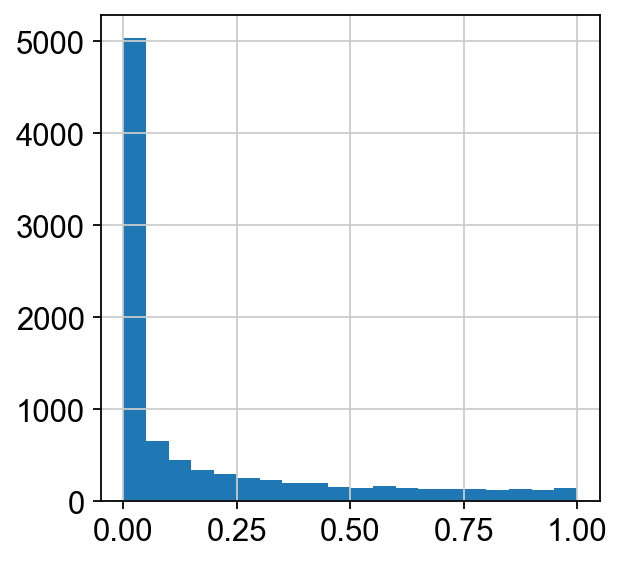

In [10]:
anova_res['PR(>F)'].hist(bins=20)

## PCA

In [11]:
adata_norm_anova = adata_pb_norm[:, adata_pb_norm.var.p_val_adj < 0.05]
df = pd.DataFrame(adata_norm_anova.X, columns=adata_norm_anova.var_names, index=adata_norm_anova.obs_names)
df.head()

,A1BG,AACS,AADAT,AAK1,AARS1,AATK,ABAT,ABCA2,ABCA3,ABCA5,...,ZNF771,ZNF791,ZNF92,ZNFX1,ZNRF3,ZSWIM5,ZSWIM6,ZWILCH,ZYG11B,ZYX
chimp_11454_L1,0.005079,-0.108424,0.013291,-0.069955,0.002562,-0.047274,0.080485,-0.001263,0.005546,-0.100004,...,0.092490,0.119454,-0.007902,0.177926,-0.012706,0.047432,-0.010286,0.028279,-0.013137,0.022066
chimp_13309_L1,-0.014054,-0.004051,-0.002748,0.055413,0.014893,-0.035207,-0.030835,-0.000636,0.012722,0.012190,...,0.156169,-0.012133,-0.004915,-0.053168,0.058397,0.000000,0.024417,-0.016176,-0.005356,-0.000944
chimp_j8_L1,0.009907,-0.088813,0.001865,-0.002917,0.029188,-0.010154,-0.067142,-0.000510,-0.010249,-0.120019,...,0.063283,0.075654,0.016909,0.009687,0.015233,0.000000,-0.001553,-0.003124,-0.003501,-0.004307
human_759_L1,-0.142812,-0.068295,0.029625,-0.167612,-0.043530,-0.042047,0.103104,-0.051013,-0.051488,0.038154,...,-0.002273,-0.029408,0.007854,-0.022676,0.268809,0.008330,0.024852,-0.084963,-0.053720,0.083597
human_j12_L1,-0.018240,-0.116677,-0.055486,-0.126356,-0.054107,-0.069466,0.038200,-0.113067,-0.053844,-0.028488,...,-0.035837,0.002423,0.006162,0.028334,0.171663,-0.047386,-0.023089,-0.132802,-0.138752,0.050423


In [12]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df.loc[df.index.str.contains(cond)].index
    order = samples.sort_values()
    order_laminar = order[order.str.contains('L')].tolist()
    order_wm = order[order.str.contains('WM')].tolist()
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df = df.loc[sample_order['all']]

In [14]:
#import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(adata_pb_norm.X.T)

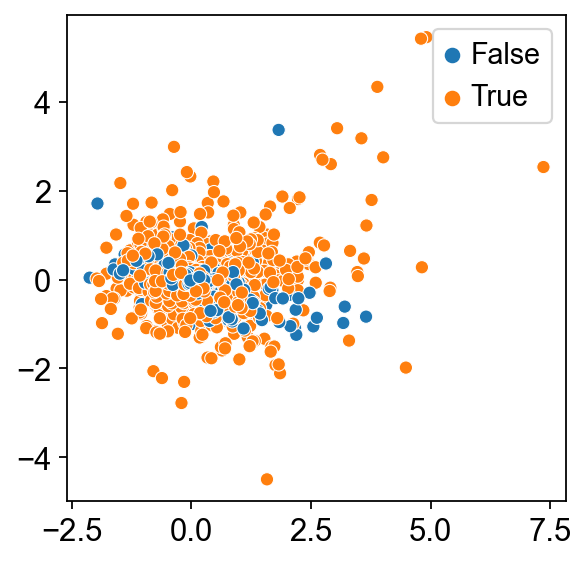

In [15]:
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=(adata_pb_norm.var.p_val_adj < 0.05).values)
plt.grid(False)

# Genes that a significant for different species (t-test)

## Human-specific genes

In [16]:
ttest_res.head()

,gene,layer,group1,group2,score,pvalue,p_val_adj
0,A1BG,L1,human,chimp,-1.790136,0.123630,0.345077
1,AACS,L1,human,chimp,0.363287,0.728846,0.861269
2,AADAT,L1,human,chimp,0.869717,0.417885,0.645979
3,AAK1,L1,human,chimp,-2.016288,0.090364,0.295232
4,AARS1,L1,human,chimp,-0.056056,0.957117,0.981898


Subset genes that are significant in human comparisons

In [17]:
# subset signif genes
human_specific = ttest_res[(ttest_res.p_val_adj < 0.05) & (ttest_res.group1 == 'human')].copy()
# add column for direction of change
human_specific['change_dir'] = np.sign(human_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(human_specific.group2)
human_specific = pd.concat([human_specific, onehot_group2], axis=1)

human_specific.tail()

,gene,layer,group1,group2,score,pvalue,p_val_adj,change_dir,chimp,macaque
8698,ZDHHC9,WM,human,macaque,-5.215560,0.001232,0.040315,down,False,True
8706,ZFPM2,WM,human,macaque,5.080672,0.001430,0.042662,up,False,True
8714,ZMAT4,WM,human,macaque,5.229102,0.001214,0.040243,up,False,True
8733,ZNF304,WM,human,macaque,5.630775,0.000790,0.034185,up,False,True
8745,ZNF483,WM,human,macaque,-9.972743,0.000022,0.009311,down,False,True


### Barplot for number of sign genes

Aggregate comparisons for each layer

In [18]:
dummie_df = (
    human_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'chimp': 'sum', 'macaque': 'sum'})
)

dummie_df['shared'] = dummie_df.chimp * dummie_df.macaque
dummie_df.tail()

,change_dir,layer,gene,chimp,macaque,shared
3201,up,WM,WIF1,0,1,0
3202,up,WM,YARS1,0,1,0
3203,up,WM,ZFPM2,0,1,0
3204,up,WM,ZMAT4,0,1,0
3205,up,WM,ZNF304,0,1,0


Count number of signif genes for each layer

In [19]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'chimp': 'sum', 'macaque': 'sum'})
)

count_sign

shared  chimp  macaque
change_dir layer                        
down       L1         25     63      146
           L2         23     42      189
           L3         65    136      426
           L4         25     77      223
           L5         21     55      148
           L6         17     32       64
           WM         13     37      169
up         L1          5     15       53
           L2         23     44      148
           L3         52     84      357
           L4         48    107      240
           L5         53    138      279
           L6         32     75      107
           WM          6     20      140

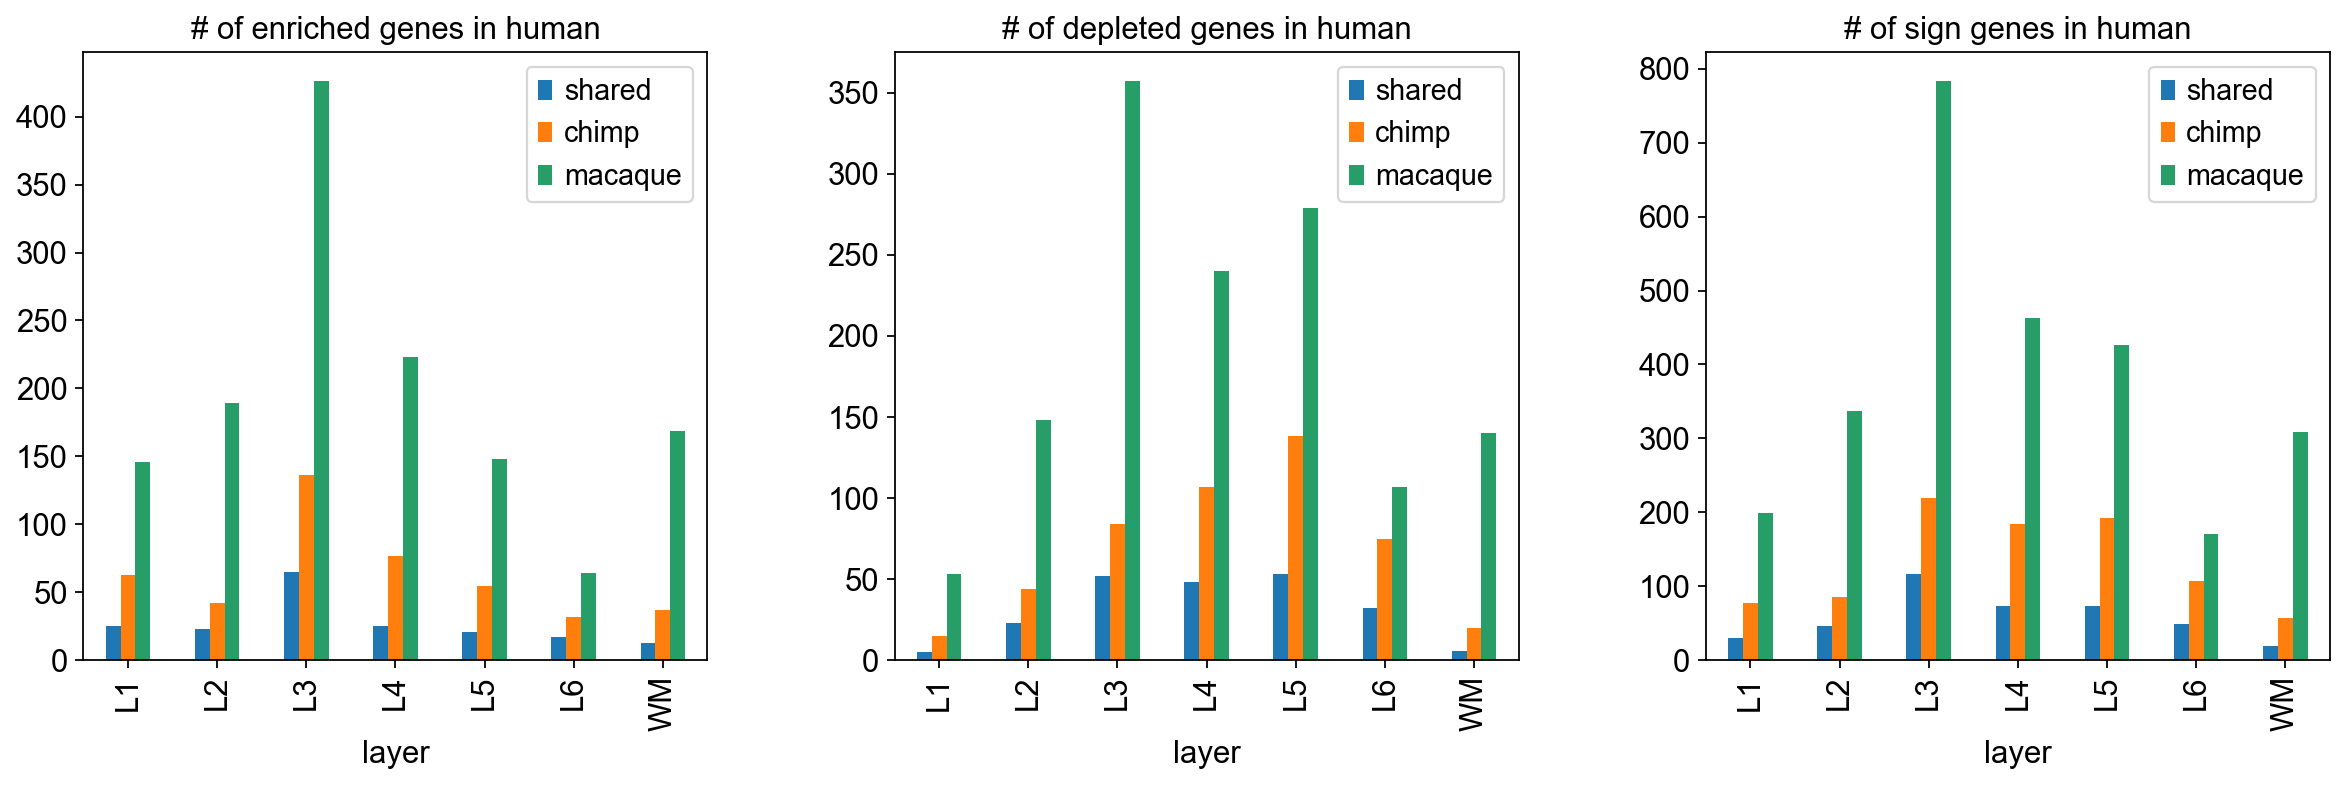

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in human')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in human')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'chimp': 'sum', 'macaque': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in human')
ax[2].grid(False)

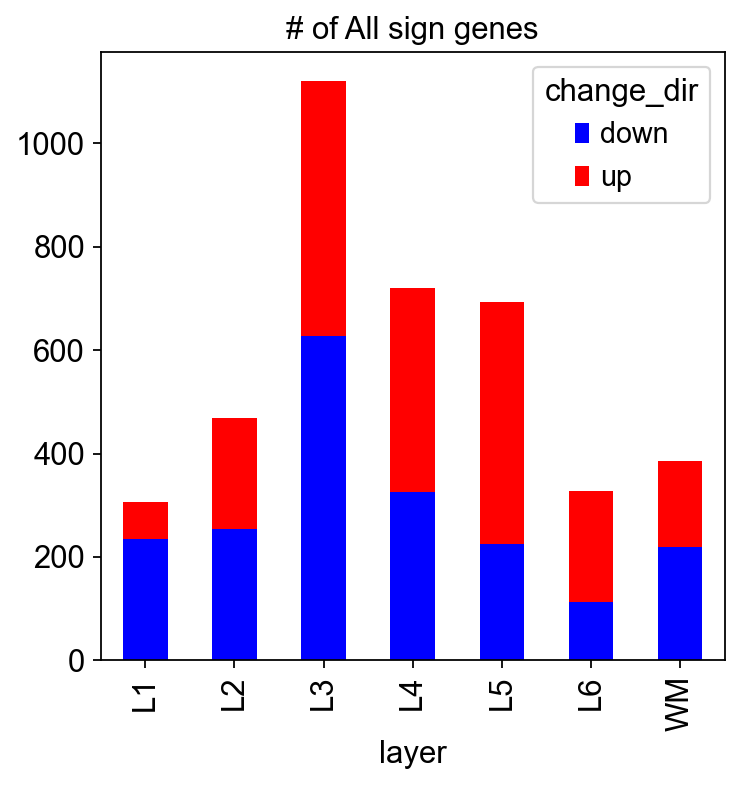

In [21]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3})
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [22]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['chimp', 'macaque']] = composition_sign.loc[:, ['chimp', 'macaque']] - composition_sign.shared.values.reshape(14, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(14, -1)
composition_sign

shared     chimp   macaque
change_dir layer                              
down       L1     0.135870  0.206522  0.657609
           L2     0.110577  0.091346  0.798077
           L3     0.130785  0.142857  0.726358
           L4     0.090909  0.189091  0.720000
           L5     0.115385  0.186813  0.697802
           L6     0.215190  0.189873  0.594937
           WM     0.067358  0.124352  0.808290
up         L1     0.079365  0.158730  0.761905
           L2     0.136095  0.124260  0.739645
           L3     0.133676  0.082262  0.784062
           L4     0.160535  0.197324  0.642140
           L5     0.145604  0.233516  0.620879
           L6     0.213333  0.286667  0.500000
           WM     0.038961  0.090909  0.870130

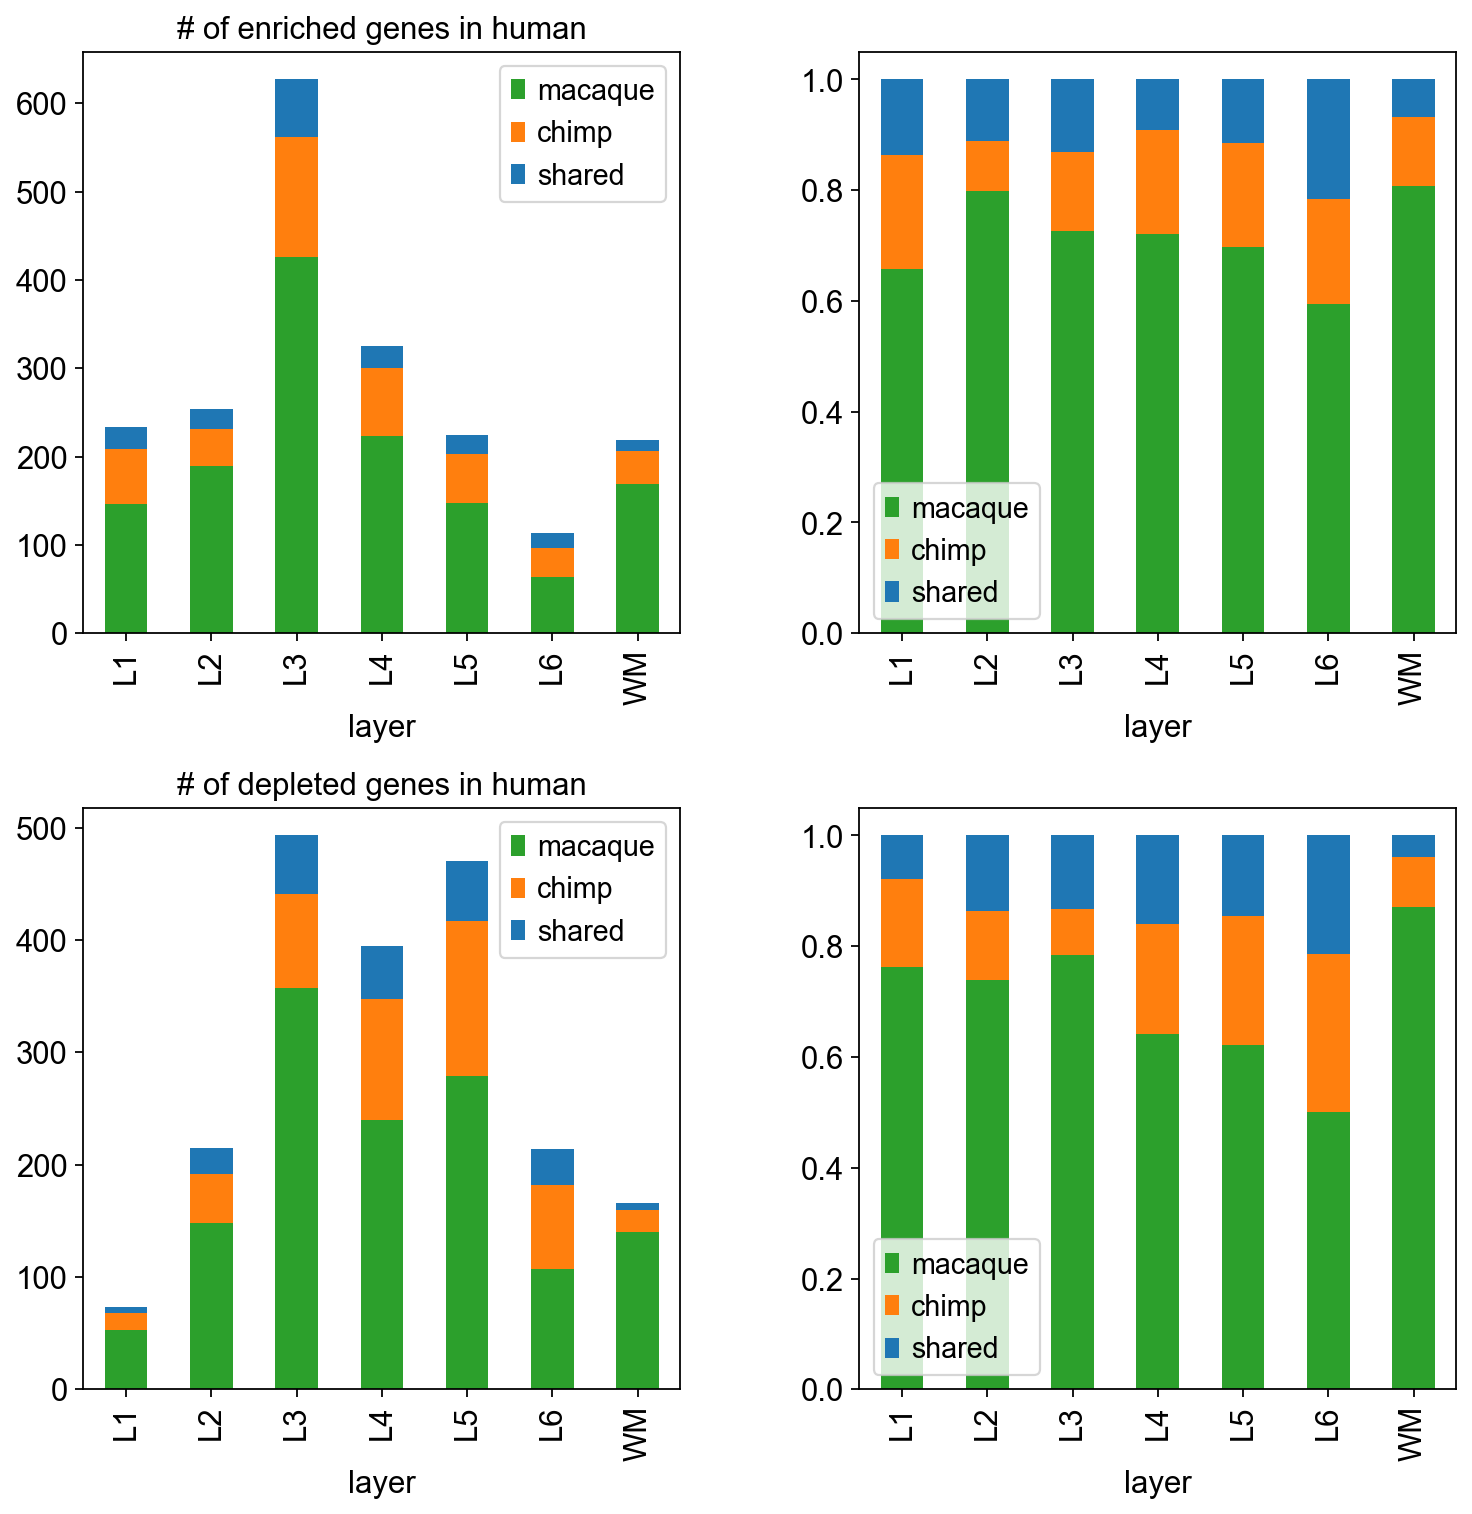

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
order = ['macaque', 'chimp', 'shared']
color = {'macaque': 'tab:green', 'chimp': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in human')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in human')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

In [24]:
dummie_df

,change_dir,layer,gene,chimp,macaque,shared
0,down,L1,ABI2,1,0,0
1,down,L1,ACAD10,0,1,0
2,down,L1,ACBD7,0,1,0
3,down,L1,ACSL4,0,1,0
4,down,L1,ACTG1,1,0,0
...,...,...,...,...,...,...
3201,up,WM,WIF1,0,1,0
3202,up,WM,YARS1,0,1,0
3203,up,WM,ZFPM2,0,1,0
3204,up,WM,ZMAT4,0,1,0


### Jaccard heatmap for layers

In [25]:
dummie_layer = (
    dummie_df
    .layer
    .str
    .get_dummies()
)

dummie_layer['gene'] = dummie_df['gene']

dummie_layer = (
    dummie_layer
    .groupby('gene')
    .sum()
    .replace({2: 1})
)
dummie_layer.head()

,L1,L2,L3,L4,L5,L6,WM
gene,,,,,,,
AADAT,0,0,1,0,0,0,1
AARS1,0,0,1,0,0,0,0
AATK,0,1,0,0,0,0,1
ABAT,0,0,0,0,0,1,0
ABCA2,0,0,0,0,1,0,0


In [26]:
dummie_layer.sum()

L1    247
L2    376
L3    883
L4    573
L5    540
L6    228
WM    347
dtype: int64

In [27]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer.T), columns=dummie_layer.columns, index=dummie_layer.columns)
pairwise_jaccard

,L1,L2,L3,L4,L5,L6,WM
L1,1.000000,0.057725,0.078244,0.080369,0.110014,0.096998,0.024138
L2,0.057725,1.000000,0.140399,0.085812,0.129470,0.098182,0.124417
L3,0.078244,0.140399,1.000000,0.145555,0.142055,0.080739,0.132597
L4,0.080369,0.085812,0.145555,1.000000,0.114114,0.045692,0.104442
L5,0.110014,0.129470,0.142055,0.114114,1.000000,0.092461,0.107366
L6,0.096998,0.098182,0.080739,0.045692,0.092461,1.000000,0.041667
WM,0.024138,0.124417,0.132597,0.104442,0.107366,0.041667,1.000000


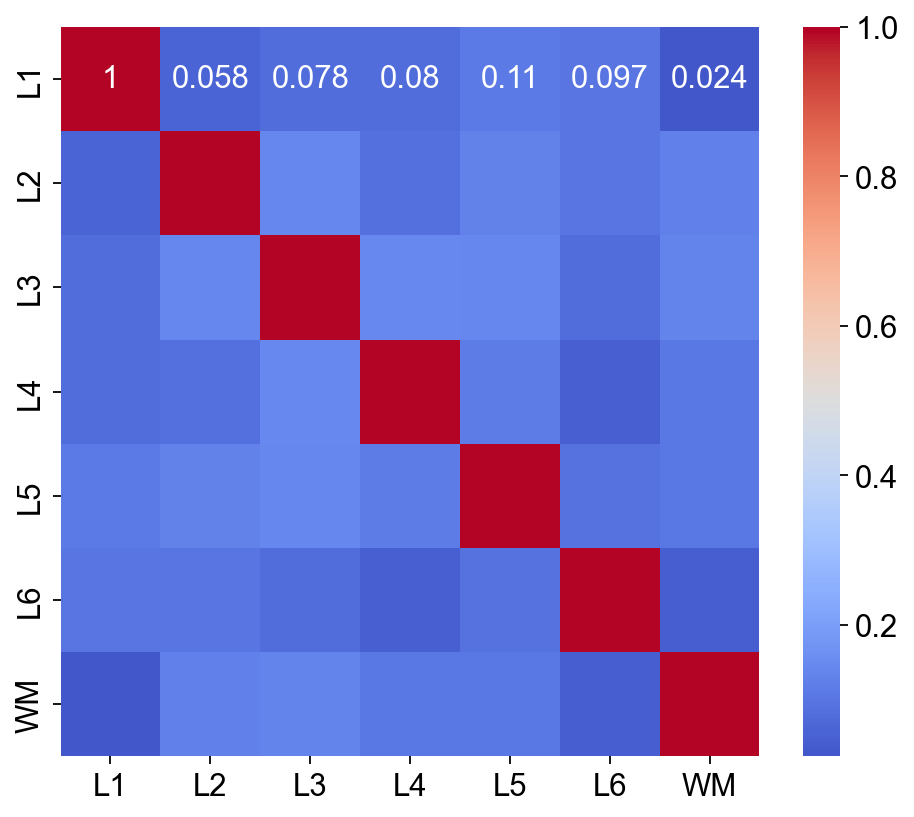

In [28]:
plt.figure(figsize=(7, 6))
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)

## Chimpanzee-specific genes

In [29]:
ttest_res.head()

,gene,layer,group1,group2,score,pvalue,p_val_adj
0,A1BG,L1,human,chimp,-1.790136,0.123630,0.345077
1,AACS,L1,human,chimp,0.363287,0.728846,0.861269
2,AADAT,L1,human,chimp,0.869717,0.417885,0.645979
3,AAK1,L1,human,chimp,-2.016288,0.090364,0.295232
4,AARS1,L1,human,chimp,-0.056056,0.957117,0.981898


Subset genes that are significant in chimp comparisons

In [30]:
# subset signif genes
chimp_specific = ttest_res[(ttest_res.p_val_adj < 0.05) & ((ttest_res.group1 == 'chimp') | (ttest_res.group2 == 'chimp'))].copy()
chimp_specific.loc[chimp_specific.group1 == 'human', ['group1', 'group2']] = ['chimp', 'human']
chimp_specific.loc[chimp_specific.group2 == 'human', 'score'] *= -1
# add column for direction of change
chimp_specific['change_dir'] = np.sign(chimp_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(chimp_specific.group2)
chimp_specific = pd.concat([chimp_specific, onehot_group2], axis=1)

chimp_specific.tail()

,gene,layer,group1,group2,score,pvalue,p_val_adj,change_dir,human,macaque
13021,WLS,WM,chimp,macaque,-5.584440,0.001401,0.042369,down,False,True
13055,ZBED1,WM,chimp,macaque,-7.312776,0.000334,0.026138,down,False,True
13111,ZNF146,WM,chimp,macaque,-6.393442,0.000689,0.032166,down,False,True
13120,ZNF304,WM,chimp,macaque,6.456161,0.000654,0.031809,up,False,True
13132,ZNF483,WM,chimp,macaque,-13.829457,0.000009,0.006199,down,False,True


### Barplot for number of sign genes

Aggregate comparisons for each layer

In [31]:
dummie_df = (
    chimp_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'human': 'sum', 'macaque': 'sum'})
)

dummie_df['shared'] = dummie_df.human * dummie_df.macaque
dummie_df.tail()

,change_dir,layer,gene,human,macaque,shared
2625,up,WM,VPS13B,1,0,0
2626,up,WM,ZBTB34,1,0,0
2627,up,WM,ZBTB6,1,0,0
2628,up,WM,ZC3H11A,1,0,0
2629,up,WM,ZNF304,0,1,0


Count number of signif genes for each layer

In [32]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'human': 'sum', 'macaque': 'sum'})
)

count_sign

shared  human  macaque
change_dir layer                        
down       L1          3     15       68
           L2          3     44      112
           L3         14     84      302
           L4         20    107      174
           L5         29    138      147
           L6          7     75       67
           WM          2     20       78
up         L1          7     63       66
           L2          8     42       92
           L3         20    136      284
           L4         15     77      128
           L5         13     55      174
           L6          6     32       64
           WM          1     37       97

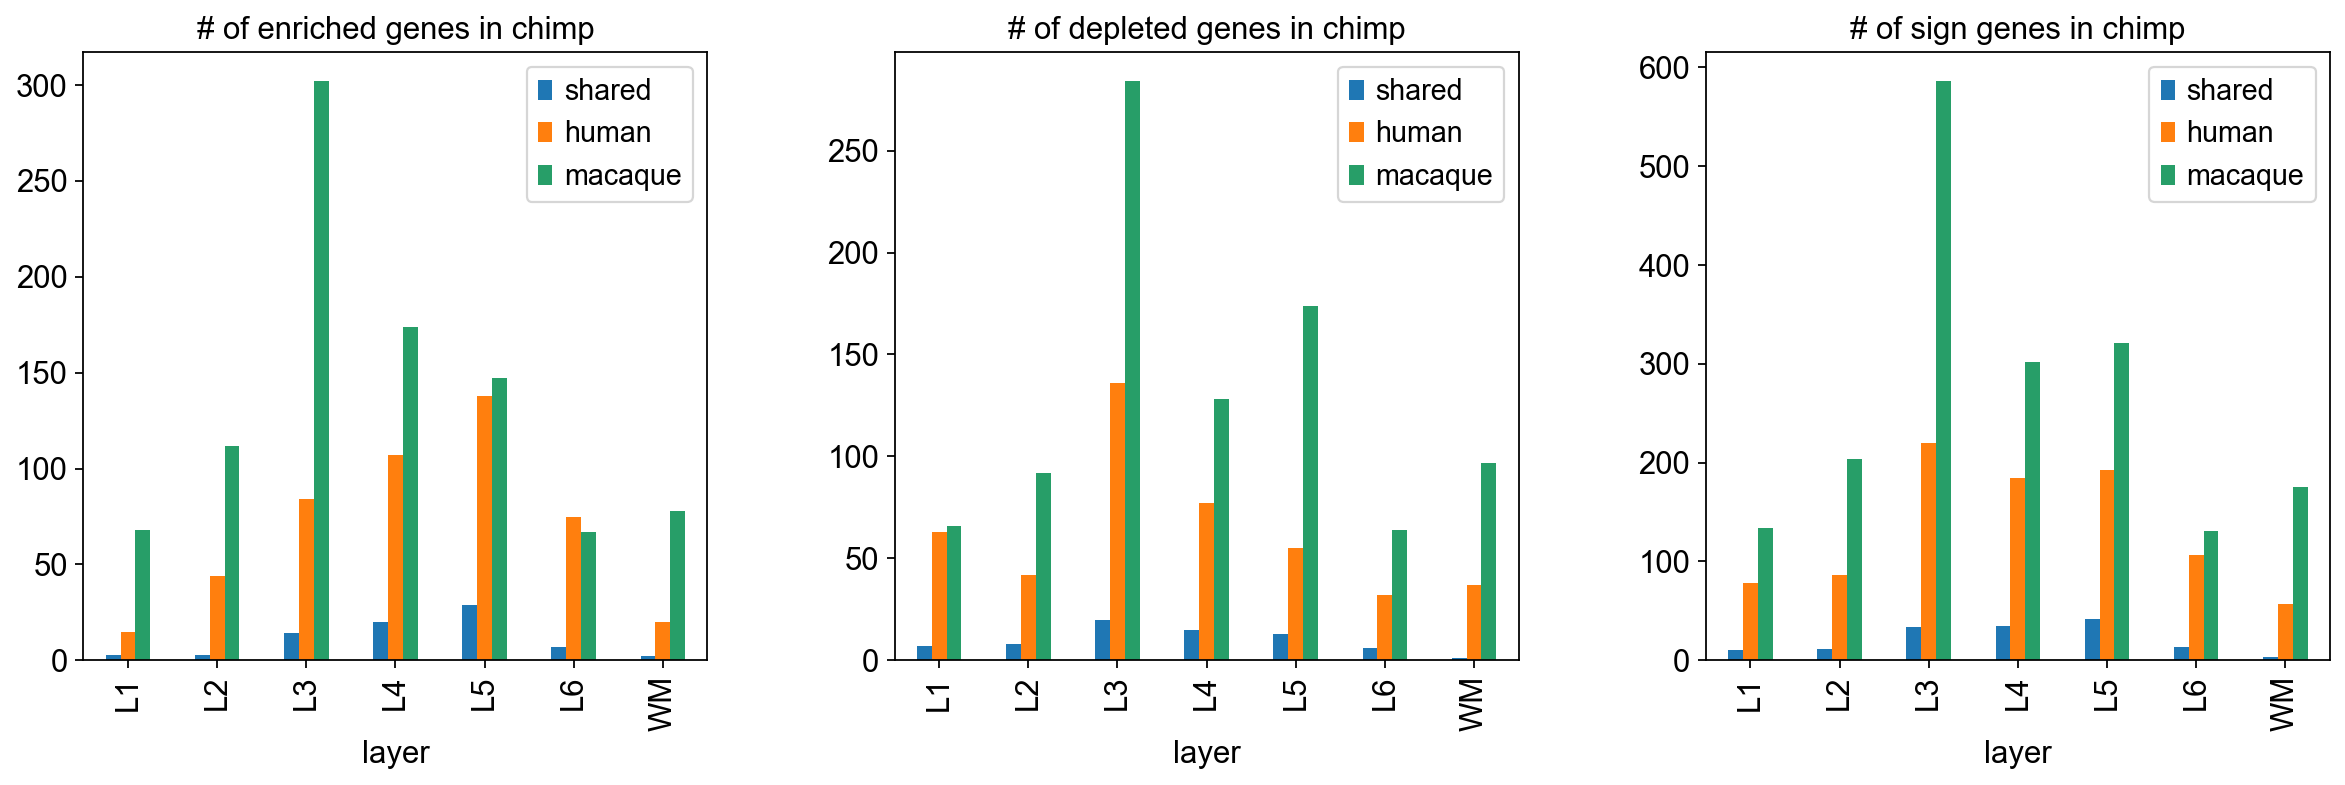

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in chimp')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in chimp')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'human': 'sum', 'macaque': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in chimp')
ax[2].grid(False)

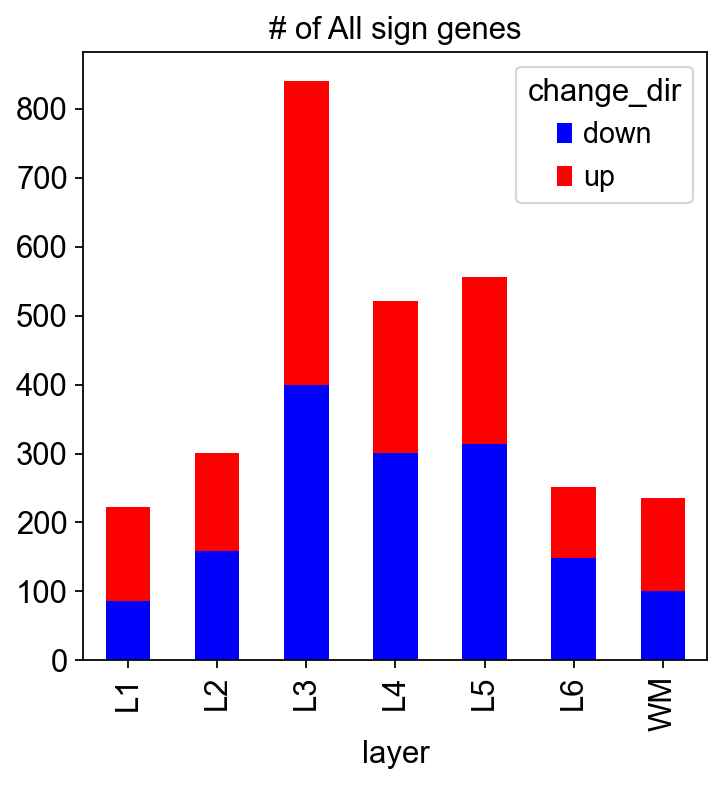

In [34]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3})
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [35]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['human', 'macaque']] = composition_sign.loc[:, ['human', 'macaque']] - composition_sign.shared.values.reshape(14, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(14, -1)
composition_sign

shared     human   macaque
change_dir layer                              
down       L1     0.037500  0.150000  0.812500
           L2     0.019608  0.267974  0.712418
           L3     0.037634  0.188172  0.774194
           L4     0.076628  0.333333  0.590038
           L5     0.113281  0.425781  0.460938
           L6     0.051852  0.503704  0.444444
           WM     0.020833  0.187500  0.791667
up         L1     0.057377  0.459016  0.483607
           L2     0.063492  0.269841  0.666667
           L3     0.050000  0.290000  0.660000
           L4     0.078947  0.326316  0.594737
           L5     0.060185  0.194444  0.745370
           L6     0.066667  0.288889  0.644444
           WM     0.007519  0.270677  0.721805

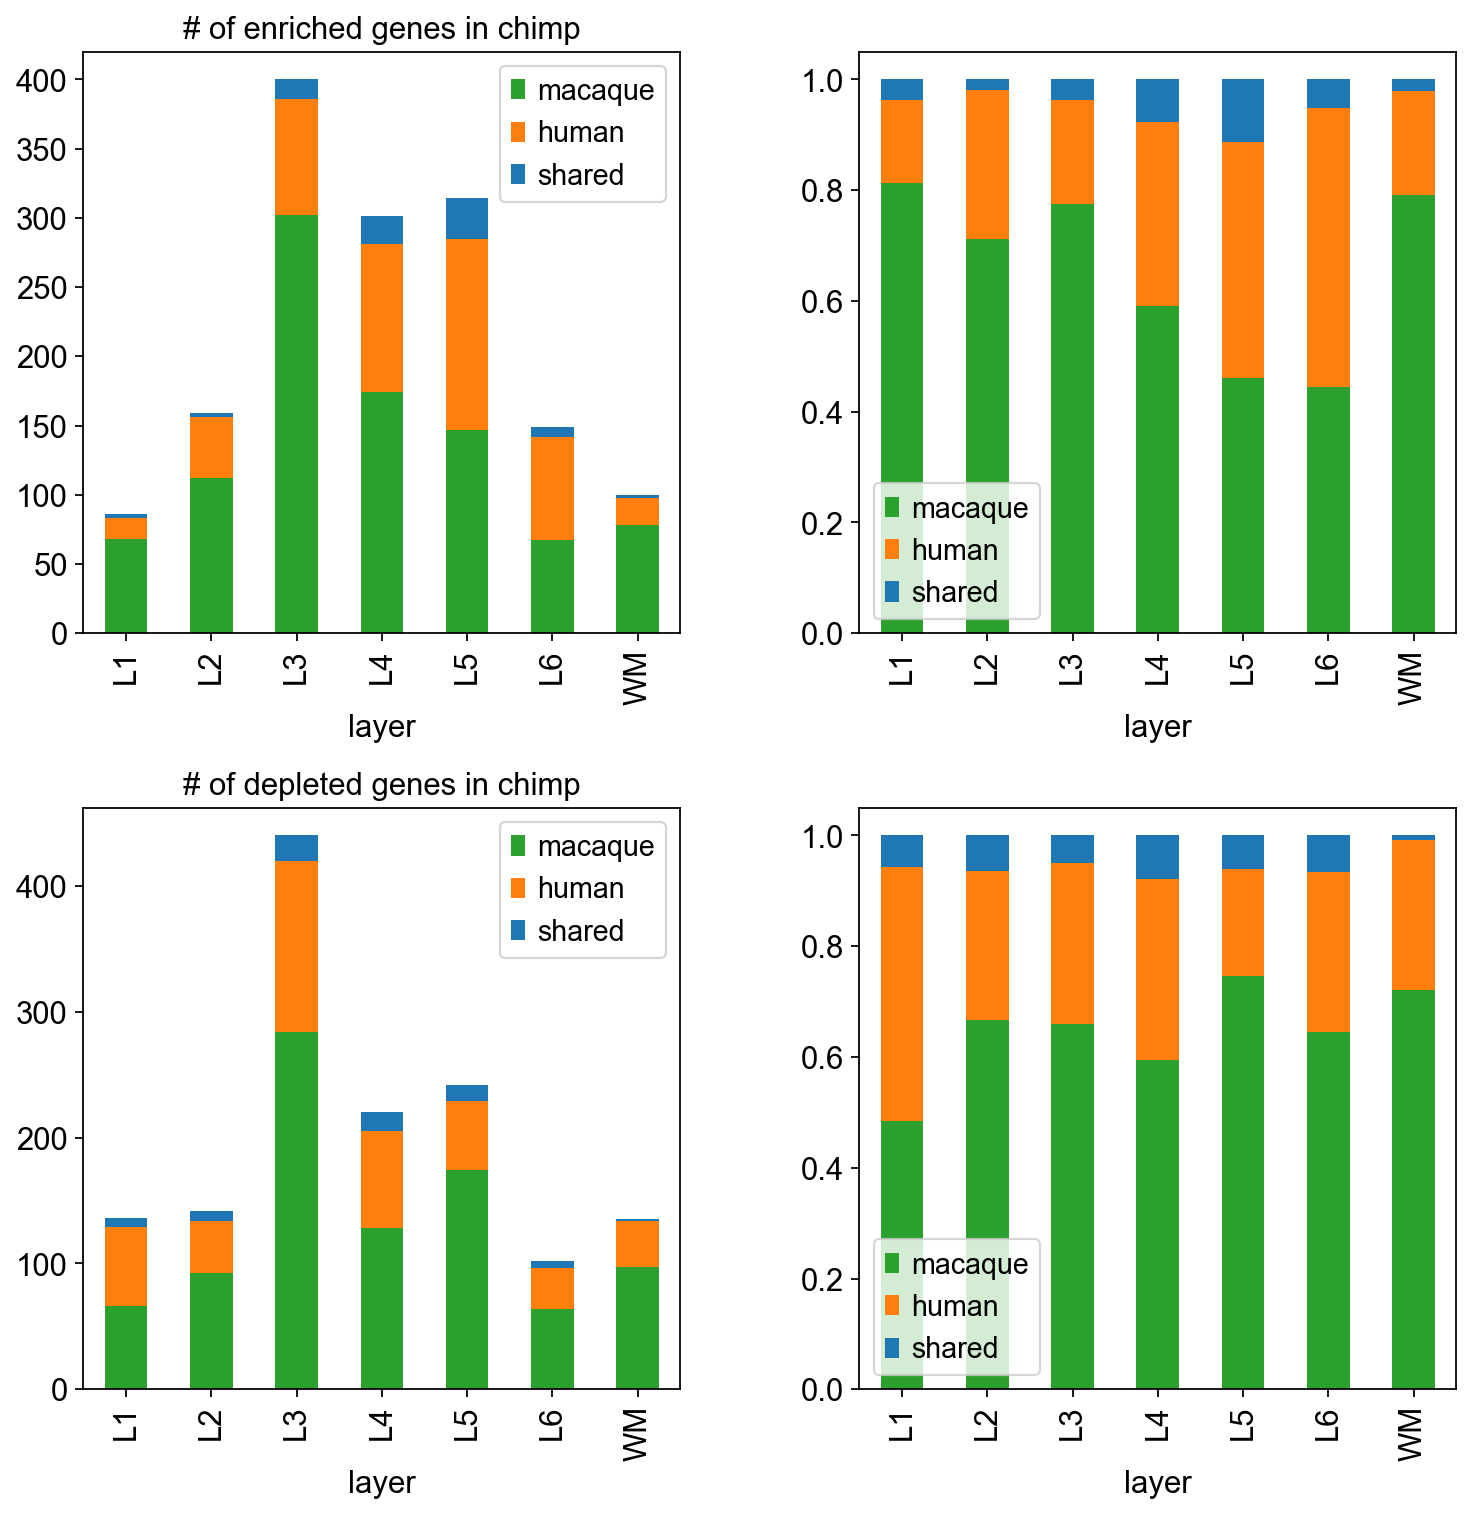

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
order = ['macaque', 'human', 'shared']
color = {'macaque': 'tab:green', 'human': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in chimp')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in chimp')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

## Macaque-specific genes

In [37]:
ttest_res.head()

,gene,layer,group1,group2,score,pvalue,p_val_adj
0,A1BG,L1,human,chimp,-1.790136,0.123630,0.345077
1,AACS,L1,human,chimp,0.363287,0.728846,0.861269
2,AADAT,L1,human,chimp,0.869717,0.417885,0.645979
3,AAK1,L1,human,chimp,-2.016288,0.090364,0.295232
4,AARS1,L1,human,chimp,-0.056056,0.957117,0.981898


Subset genes that are significant in macaque comparisons

In [38]:
# subset signif genes
macaque_specific = ttest_res[(ttest_res.p_val_adj < 0.05) &  (ttest_res.group2 == 'macaque')].copy()
macaque_specific.columns = ['gene', 'layer', 'group2', 'group1', 'score', 'pvalue', 'p_val_adj']
macaque_specific.score = -1 * macaque_specific.score
# add column for direction of change
macaque_specific['change_dir'] = np.sign(macaque_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(macaque_specific.group2)
macaque_specific = pd.concat([macaque_specific, onehot_group2], axis=1)

macaque_specific.tail()

,gene,layer,group2,group1,score,pvalue,p_val_adj,change_dir,chimp,human
13021,WLS,WM,chimp,macaque,5.584440,0.001401,0.042369,up,True,False
13055,ZBED1,WM,chimp,macaque,7.312776,0.000334,0.026138,up,True,False
13111,ZNF146,WM,chimp,macaque,6.393442,0.000689,0.032166,up,True,False
13120,ZNF304,WM,chimp,macaque,-6.456161,0.000654,0.031809,down,True,False
13132,ZNF483,WM,chimp,macaque,13.829457,0.000009,0.006199,up,True,False


### Barplot for number of sign genes

Aggregate comparisons for each layer

In [39]:
dummie_df = (
    macaque_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'human': 'sum', 'chimp': 'sum'})
)

dummie_df['shared'] = dummie_df.human * dummie_df.chimp
dummie_df.tail()

,change_dir,layer,gene,human,chimp,shared
3785,up,WM,ZBED1,0,1,0
3786,up,WM,ZBTB34,1,0,0
3787,up,WM,ZDHHC9,1,0,0
3788,up,WM,ZNF146,0,1,0
3789,up,WM,ZNF483,1,1,1


Count number of signif genes for each layer

In [40]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'human': 'sum', 'chimp': 'sum'})
)

count_sign

shared  human  chimp
change_dir layer                      
down       L1         11     53     66
           L2         29    148     92
           L3        117    357    284
           L4         54    240    128
           L5         84    279    174
           L6         22    107     64
           WM         50    140     97
up         L1         15    146     68
           L2         44    189    112
           L3        150    426    302
           L4         71    223    174
           L5         45    148    147
           L6         11     64     67
           WM         49    169     78

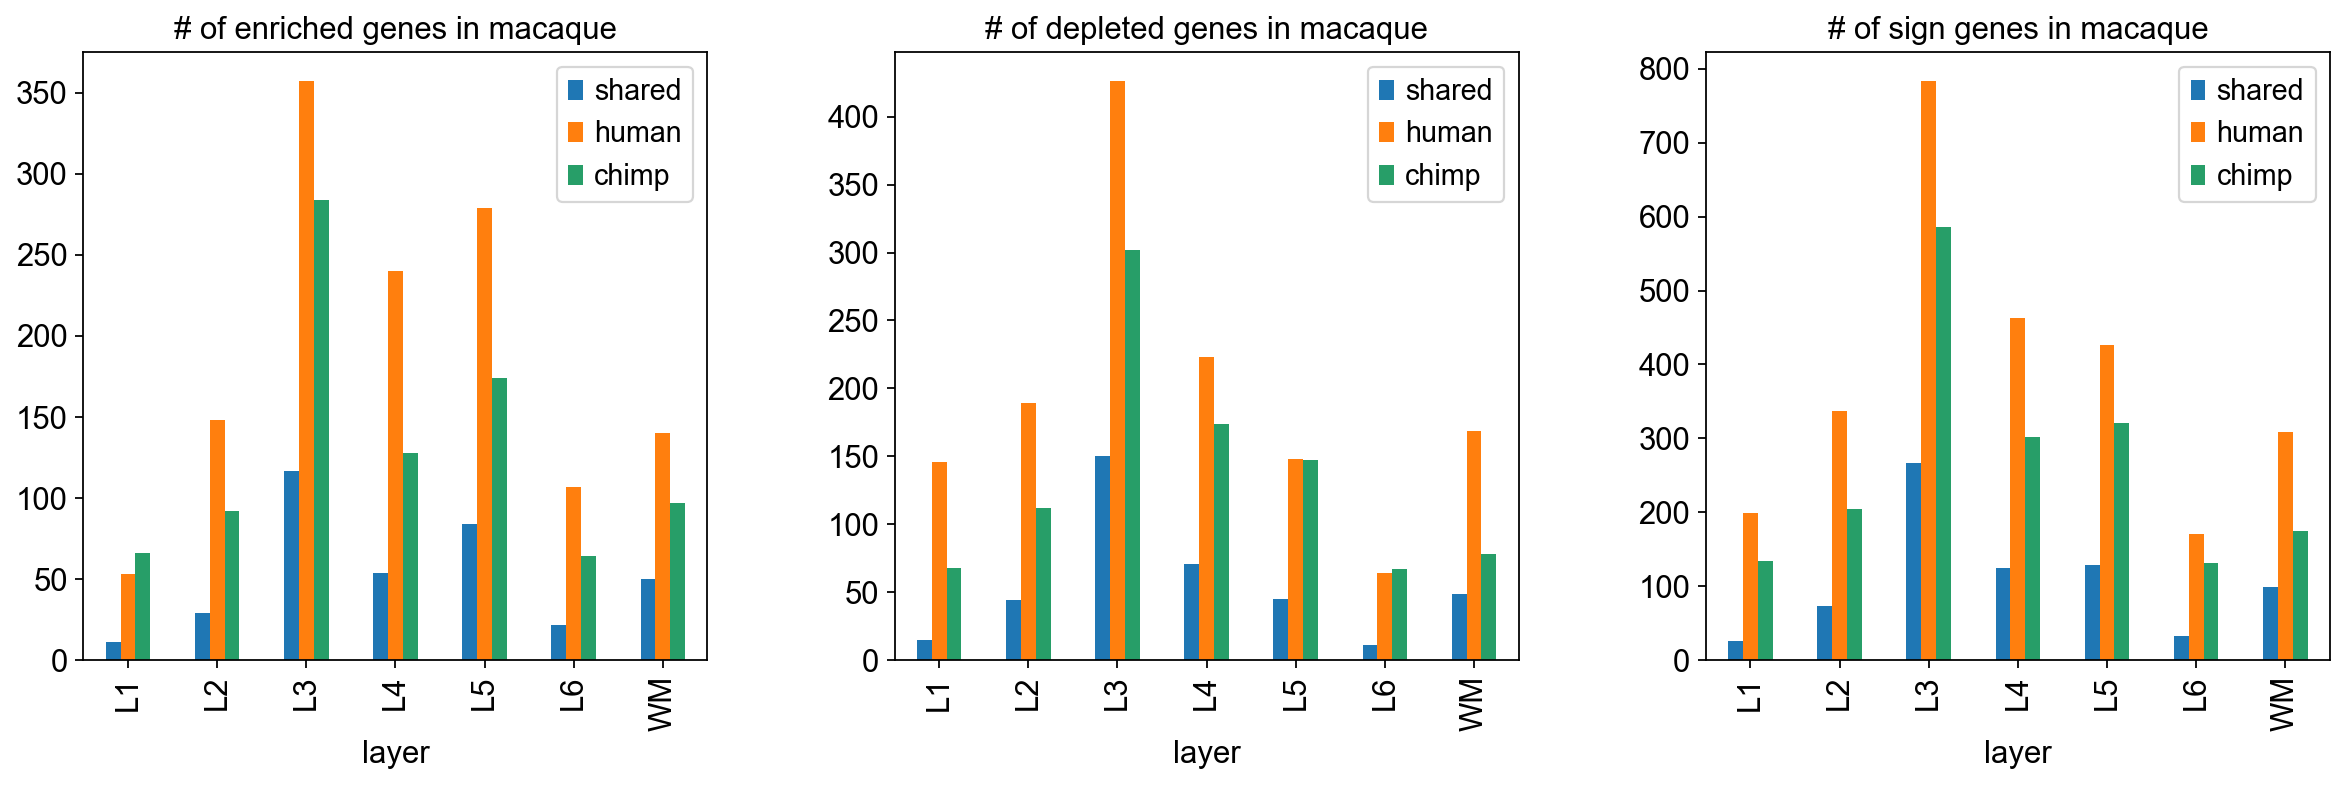

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in macaque')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in macaque')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'human': 'sum', 'chimp': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in macaque')
ax[2].grid(False)

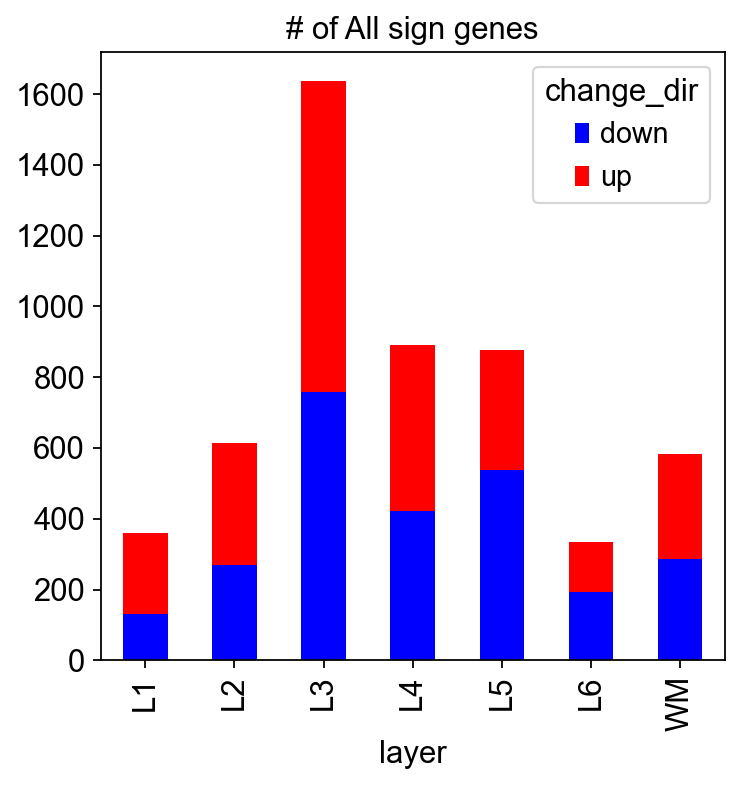

In [42]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3})
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [43]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['human', 'chimp']] = composition_sign.loc[:, ['human', 'chimp']] - composition_sign.shared.values.reshape(14, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(14, -1)
composition_sign

shared     human     chimp
change_dir layer                              
down       L1     0.101852  0.388889  0.509259
           L2     0.137441  0.563981  0.298578
           L3     0.223282  0.458015  0.318702
           L4     0.171975  0.592357  0.235669
           L5     0.227642  0.528455  0.243902
           L6     0.147651  0.570470  0.281879
           WM     0.267380  0.481283  0.251337
up         L1     0.075377  0.658291  0.266332
           L2     0.171206  0.564202  0.264591
           L3     0.259516  0.477509  0.262976
           L4     0.217791  0.466258  0.315951
           L5     0.180000  0.412000  0.408000
           L6     0.091667  0.441667  0.466667
           WM     0.247475  0.606061  0.146465

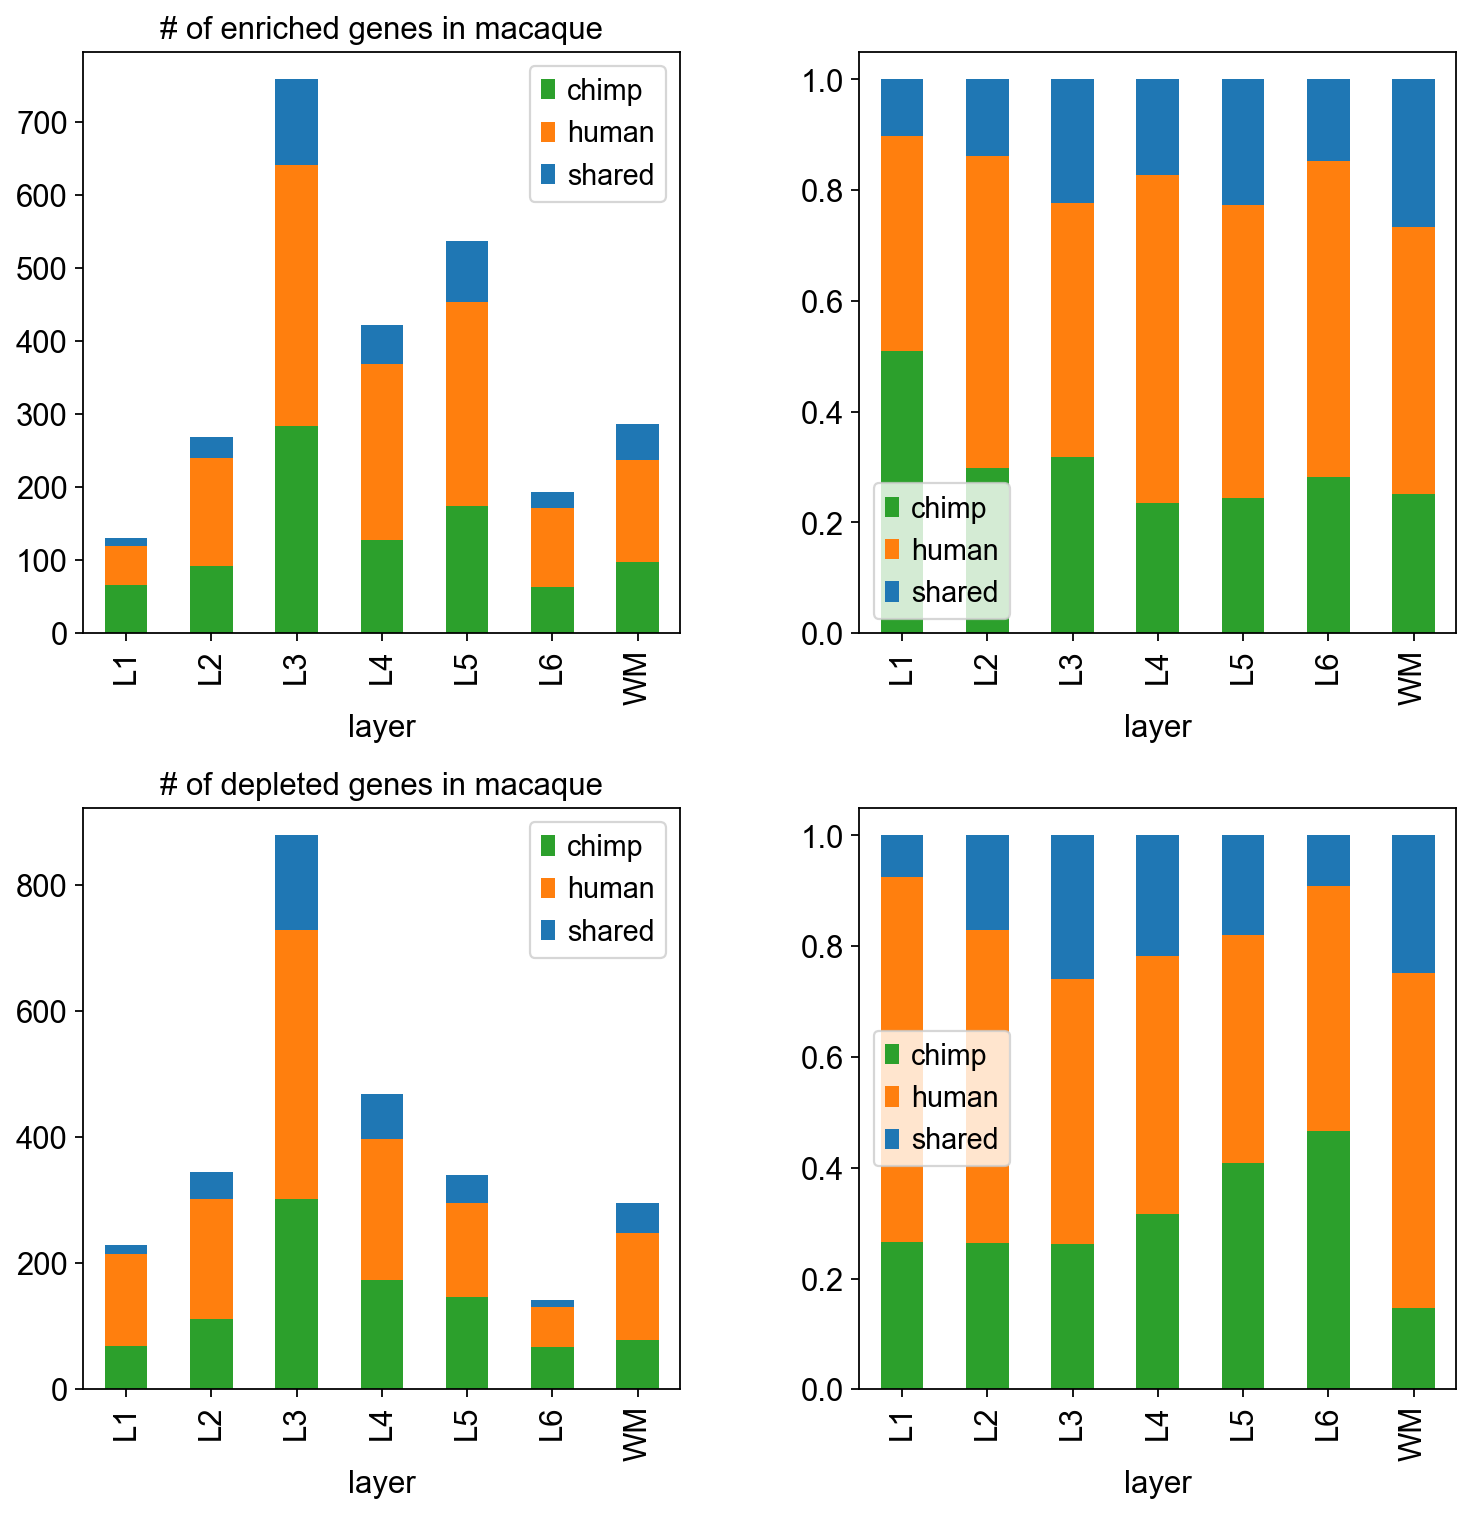

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
order = ['chimp', 'human', 'shared']
color = {'chimp': 'tab:green', 'human': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in macaque')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in macaque')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)